In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/drive', force_remount=True)
import os
os.chdir('/drive/My Drive')
os.listdir()
path=('drive/My drive/Traindata-for-thesis5.csv')
#!ls

Mounted at /drive


In [ ]:
# !pip install pandas
import pandas as pd
traindata = pd.read_csv('Traindata-for-thesis5.csv')
traindata.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,department_no,index_code,index_group_no,section_no,club_member_status,fashion_news_frequency,age,postal_code,product_type_no,graphical_appearance_no,colour_group_code,garment_group_no
0,2018-11-14,000bb8a3a8be8ad1039aece8498c0b63f158fa04d8ef95...,608776002,0.013542,1,608776,3611,B,1,62,ACTIVE,Regularly,32.0,6a632bf59601ffae21472256dc14dda7e9e89d7d2e60be...,302,1010016,9,1021
1,2018-10-23,000fd548002726b75586e82114771cf408a6070ea71ba0...,372860001,0.011508,1,372860,3611,B,1,62,ACTIVE,Regularly,32.0,399a721224876f53159ab05e78c2c277d6c42742e2f15f...,302,1010016,9,1021
2,2018-10-03,00155b2ef48cfb5d2fce4642f670f151efe0747542a5b9...,562245005,0.033881,2,562245,1722,A,1,15,ACTIVE,Regularly,21.0,77d01d7a5cf3801525dd923345e47d079fea7dc14dcfcd...,272,1010023,8,1009
3,2018-10-14,0018a4640de2338492de0fcc8325d6f6687d0c7980d804...,542402001,0.016932,2,542402,3608,B,1,62,ACTIVE,Regularly,33.0,fa934d2f604ecd6f997d3a9d82f81722a5023185010217...,304,1010016,9,1021
4,2018-09-29,001ae5408a043f64bccd32beffe2730151414cbdf18a6e...,108775015,0.006763,1,108775,1676,A,1,16,ACTIVE,Regularly,50.0,3247b5db1c4e6523a6d1e84eb25183a1cfc8a468eb9fed...,253,1010016,9,1002


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
traindata['product_code']= label_encoder.fit_transform(traindata['product_code'])
traindata['customer_id']= label_encoder.fit_transform(traindata['customer_id'])
traindata['article_id']= label_encoder.fit_transform(traindata['article_id'])
traindata['department_no']= label_encoder.fit_transform(traindata['department_no'])
traindata['index_code']= label_encoder.fit_transform(traindata['index_code'])
traindata['section_no']= label_encoder.fit_transform(traindata['section_no'])
traindata['club_member_status']= label_encoder.fit_transform(traindata['club_member_status'])
traindata['fashion_news_frequency']= label_encoder.fit_transform(traindata['fashion_news_frequency'])
traindata['postal_code']= label_encoder.fit_transform(traindata['postal_code'])
traindata['age']= label_encoder.fit_transform(traindata['age'])
traindata['product_type_no']= label_encoder.fit_transform(traindata['product_type_no'])
traindata['graphical_appearance_no']= label_encoder.fit_transform(traindata['graphical_appearance_no'])
traindata['colour_group_code']= label_encoder.fit_transform(traindata['colour_group_code'])
traindata['garment_group_no']= label_encoder.fit_transform(traindata['garment_group_no'])
traindata['t_dat']= label_encoder.fit_transform(traindata['t_dat'])
#traindata['t_dat'].unique()

In [ ]:
traindata.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,department_no,index_code,index_group_no,section_no,club_member_status,fashion_news_frequency,age,postal_code,product_type_no,graphical_appearance_no,colour_group_code,garment_group_no
0,55,10,73,0.013542,1,46,25,1,1,11,0,2,16,27208,19,6,3,12
1,33,12,11,0.011508,1,11,25,1,1,11,0,2,16,14673,19,6,3,12
2,13,16,55,0.033881,2,37,17,0,1,2,0,2,5,30692,13,11,2,5
3,24,19,48,0.016932,2,33,24,1,1,11,0,2,17,64030,20,6,3,12
4,9,21,0,0.006763,1,0,16,0,1,3,0,2,34,12889,5,6,3,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y_train = traindata["article_id"]
traindata.drop(labels="article_id", axis=1, inplace=True)
#traindata.drop(labels="t_dat", axis=1, inplace=True)
#traindata.drop(labels="customer_id", axis=1, inplace=True)
X_train = traindata

In [ ]:
# #from sklearn.ensemble import ExtraTreesClassifier
# #import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(X_train,y_train)

In [ ]:
# print(model.feature_importances_)

In [ ]:
# feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# # plt.show()

In [ ]:
# import seaborn as sns
# corrmat = X_train.corr()
# top_corr_features = corrmat.index
# # plt.figure(figsize=(20,20))
# g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#y_train= y_train.values[0:4440]
#X_train = traindata.values[0:4440]
#X_test = traindata.values[4440:]


In [ ]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#state = 12  
#test_size = 0.30  
  
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=test_size, random_state=state)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(traindata,y_train, test_size = 0.25, random_state = 22)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = X_train
y = y_train

Knnc = KNeighborsClassifier(n_neighbors=50)
Knnc.fit(X,y)
y_pred = Knnc.predict(X_train)

print(accuracy_score(y_train, y_pred)) 

0.08458343716255504


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state = 22)
dt = dtree.fit(X_train,y_train)
dt

DecisionTreeClassifier(random_state=22)

In [ ]:
DecisionTreeClassifier(random_state=22)

DecisionTreeClassifier(random_state=22)

In [ ]:
y_pred = dt.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9960794085887532
Test data accuracy: 0.9626463992025915


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
estimator_range = [2,4,6,8,10,12,14,16,25,30]

In [ ]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

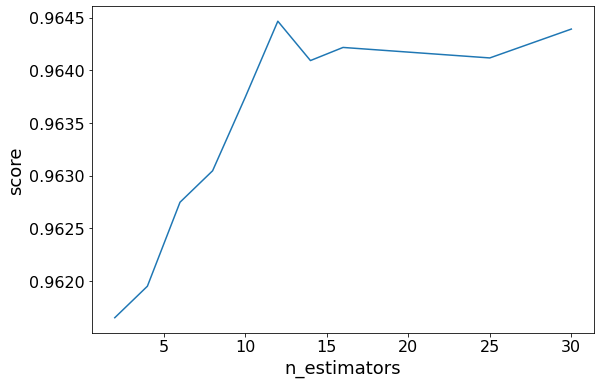

In [ ]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [ ]:
seed = 8
kfold = model_selection.KFold(shuffle=True,n_splits = 3,
                       random_state = seed)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print("accuracy train:")
print(results.mean())
results = model_selection.cross_val_score(model, X_test, y_test, cv = kfold)
print("accuracy test:")
print(results.mean())

accuracy train:
0.9645983885704794
accuracy test:
0.9609269512263605


In [ ]:
lr_list = [0.01,0.065,0.02,0.025]
#0.003,0.0025,0.35,0.25,,0.75,1
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.01
Accuracy score (training): 0.741
Accuracy score (validation): 0.741
Learning rate:  0.065
Accuracy score (training): 0.892
Accuracy score (validation): 0.892
Learning rate:  0.02
Accuracy score (training): 0.805
Accuracy score (validation): 0.805
Learning rate:  0.025
Accuracy score (training): 0.819
Accuracy score (validation): 0.818


In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.003, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[496   0   0 ...   0   0   0]
 [  0 309   0 ...   0   0   0]
 [  0   0 314 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       309
           2       1.00      0.73      0.85       429
           3       0.83      0.87      0.85       488
           4       0.00      0.00      0.00       379
           5       0.00      0.00      0.00       218
           6       0.00      0.00      0.00       459
           7       0.00      0.00      0.00       359
           8       0.00      0.00      0.00       275
           9       0.57      1.00      0.73       525
          10       0.00      0.00      0.00       390
          11       1.00      0.07      0.12       454
          12       0.00      0.00      0.00       246
          1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
